In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
df = pd.read_csv('../Data/Cars93.csv')

In [78]:
df.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [79]:
# plt.scatter(df['MPG.highway'],y);

In [80]:
y = df['MPG.city']
X = df[['Weight']]
# tmp = pd.get_dummies(df['Type'], drop_first=True)
# X = pd.concat([X, tmp], axis=1)
# tmp = pd.get_dummies(df['Origin'], drop_first=True)
# X = pd.concat([X, tmp], axis=1)
X.head(5)

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


In [101]:
X_train_whole, X_test_whole, y_train_whole, y_test_whole = train_test_split(X, y, test_size=.35)
train = xgb.DMatrix(X_train,label=y_train)
test = xgb.DMatrix(X_test,label=y_test)

In [102]:
bst = XGBRegressor(objective='reg:linear',random_state=7)
bst.fit(X_train, y_train)
print("Training set r2 value:",bst.score(X_train,y_train))
print("Test set r2 value:",bst.score(X_test,y_test))
y_pred = bst.predict(X_test)

[10:17:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Training set r2 value: 0.9663091451461789
Test set r2 value: 0.5301417974077927


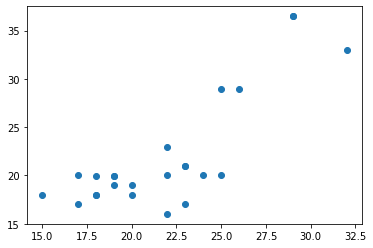

In [83]:
plt.scatter(y_test,y_pred);

In [105]:
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

scores = []

for train_index, test_index in kfold.split(X_train_whole):
    X_train , X_test = X_train_whole.iloc[train_index,:],X_train_whole.iloc[test_index,:]
#     X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_train_whole.iloc[train_index], y_train_whole.iloc[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:linear")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(xgb_model.score(X_test,y_test))
    
scores

C:\Users\Prateek Bardhan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\Prateek Bardhan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Depreca

[10:19:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:19:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[10:19:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Prateek Bardhan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)


[0.6823613788604324, 0.5384415054655334, 0.6079220358091229]

In [39]:
# y_pred

In [40]:
# y_test